In [11]:
import os
import pandas as pd
import numpy as np
import yfinance as yf


In [6]:
ticker = 'CL=F' # stock ticker symbol: WTI Crude Oil
period = 'max' # time range to look at: all time
interval = '1d' # time interval for data collected: daily
search = 'Low' # Low, High, Open, Close, Volume

In [8]:
H = 21 # Forecast horizon, in days. Note there are about 252 trading days in a year
train_size = 252*10 # Use 10 years of data as train set. Note there are about 252 trading days in a year
val_size = 252 # Use 1 year of data as validation set
N = 10 # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100 # Number of boosted trees to fit. default = 100
max_depth = 3 # Maximum tree depth for base learners. default = 3
learning_rate = 0.1 # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1 # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1 # Subsample ratio of the training instance. default = 1
colsample_bytree = 1 # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1 # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0 # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 1

In [ ]:
train_val_size = train_size + val_size # Size of train+validation set
print("No. of days in train+validation set = " + str(train_val_size))

No. of days in train+validation set = 1008


In [9]:
def get_hist(tck, srch, time='Max', ivl='1d'):
    tick = yf.Ticker(tck)
    df = tick.history(period=time, interval=ivl, back_adjust=True)
    df.to_csv('data.csv')
    # df = df[[srch]]

    # # reformat data
    # df = df.loc[::-1]
    # df = df.reset_index()

    # # add date data
    # add_datepart(df, 'Date', drop=False)
    # df.drop('Elapsed', axis=1, inplace=True)

    # # gets rid of datetime values
    # df = df.drop('Date', axis=1)

    # # start of year is never a trading day so removed
    # df = df.drop(columns='Is_year_start')

    # return df

In [ ]:
def line_plot(df, col, group):
    s = df.groupby([group])[col].mean()
    plt.plot(s.index, s.values)
    plt.show()

In [20]:
tick = yf.Ticker(ticker)
df = tick.history(period=period, interval=interval, back_adjust=True)

In [21]:
df.reset_index(inplace=True)

In [28]:
from datetime import datetime

In [36]:
df = pd.read_csv('data.csv')

In [37]:
for i in range(len(df)):
    df.Date[i] = df.Date[i][:10]

C:\Users\oliver\AppData\Local\Temp\ipykernel_3100\3015170705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[i] = df.Date[i][:10]
C:\Users\oliver\AppData\Local\Temp\ipykernel_3100\3015170705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[i] = df.Date[i][:10]
C:\Users\oliver\AppData\Local\Temp\ipykernel_3100\3015170705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[i] = df.Date[i][:10]
C:\Users\oliv

In [39]:
df.to_csv('data.csv')

In [40]:
df.to_csv(f'data.csv', index=False)

In [24]:
df = pd.read_csv('data.csv')

In [25]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-23 00:00:00-04:00,31.950001,32.799999,31.950001,32.049999,79385,0.0,0.0
1,2000-08-24 00:00:00-04:00,31.900000,32.240002,31.400000,31.629999,72978,0.0,0.0
2,2000-08-25 00:00:00-04:00,31.700001,32.099998,31.320000,32.049999,44601,0.0,0.0
3,2000-08-28 00:00:00-04:00,32.040001,32.919998,31.860001,32.869999,46770,0.0,0.0
4,2000-08-29 00:00:00-04:00,32.820000,33.029999,32.560001,32.720001,49131,0.0,0.0
...,...,...,...,...,...,...,...,...
5683,2023-04-11 00:00:00-04:00,79.879997,81.589996,79.370003,81.529999,309683,0.0,0.0
5684,2023-04-12 00:00:00-04:00,81.440002,83.529999,81.279999,83.260002,356133,0.0,0.0
5685,2023-04-13 00:00:00-04:00,83.220001,83.440002,82.110001,82.160004,261230,0.0,0.0
5686,2023-04-14 00:00:00-04:00,82.400002,83.120003,81.760002,82.519997,261230,0.0,0.0


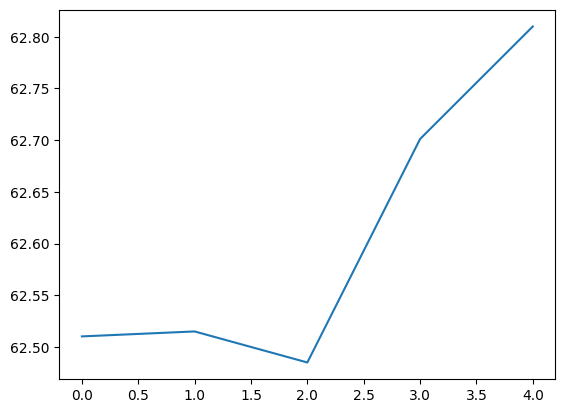

In [ ]:
line_plot(df, search, 'Dayofweek')

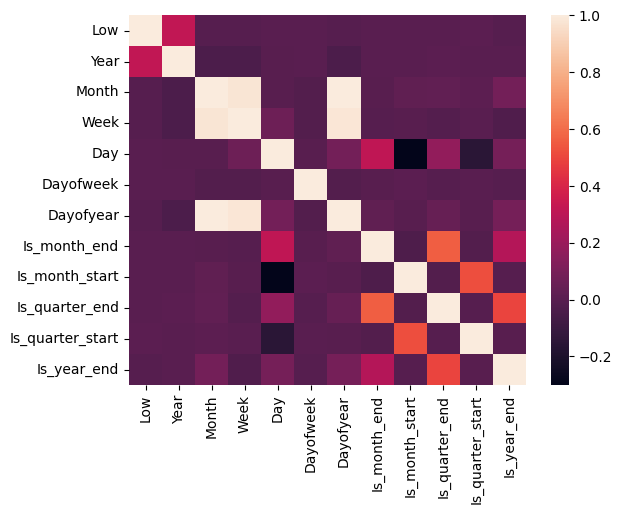

In [ ]:
dataplot = sb.heatmap(df.corr())
plt.show()

In [ ]:
# create test set of last year of data
test = df.drop(df.tail(df.shape[0]-252).index, inplace = False)
train = df

In [ ]:
y_train = train[search]
X_train = train.drop(columns=search)
y_test = test[search]
X_test = test.drop(columns=search)

In [ ]:
train_dmatrix = xg.DMatrix(data=X_train, label=y_train)
test_dmatrix = xg.DMatrix(data=X_test, label=y_test)

In [ ]:
H = 21 # Forecast horizon, in days. Note there are about 252 trading days in a year
train_size = 252*3 # Use 3 years of data as train set. Note there are about 252 trading days in a year
val_size = 252 # Use 1 year of data as validation set
N = 10 # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100 # Number of boosted trees to fit. default = 100
max_depth = 3 # Maximum tree depth for base learners. default = 3
learning_rate = 0.1 # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1 # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1 # Subsample ratio of the training instance. default = 1
colsample_bytree = 1 # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1 # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0 # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 1

In [ ]:
# Instantiation
model = xg.XGBRegressor(objective='reg:squarederror', n_estimators=13, max_depth=max_depth, learning_rate=learning_rate, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, gamma=gamma)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=13, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict the model
yhat = model.predict(X_test)

In [ ]:
# dates = {
#     'year':[],
#     'month':[],
#     'day':[]
# }
# for i in range(5):
#     dates['year'] += [2023]
#     dates['month'] += [1]
#     dates['day'] += [25+i]
# future = pd.DataFrame.from_dict(dates)
# future

In [ ]:
# X_test['Year'], X_test['Month'], X_test['Day']

In [ ]:
print(len(yhat))
print(yhat[0])
print(y_test[0])

365
78.61897
72.41999816894531


In [ ]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  3.521298


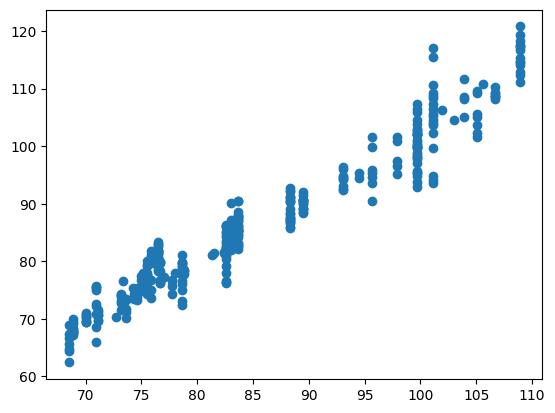

In [ ]:
plt.scatter(yhat, y_test)
plt.show()

In [ ]:
# todo:
# search prices of the last N=10 days as feature columns
# setup a prediction view method
# predict future
# run daily
